# Unsupervised Learning notebook on US Arrests data set

## Data Exporation

In [128]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import silhouette_score

df = pd.read_csv("UsArrests.csv",index_col='City')
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.20,236,58,21.20
Alaska,10.00,263,48,44.50
Arizona,8.10,294,80,31.00
Arkansas,8.80,190,50,19.50
California,9.00,276,91,40.60


The features represent the following: number of murder cases (per 100,000 people), number of assault cases (per 100,000 people), Urban Population Percentage, number of rape cases (per 100,000 people)


In [129]:
print('Number of cases: {}. Number of features: {}'.format(df.shape[0],df.shape[1]))


Number of cases: 50. Number of features: 4


In [130]:
n={'Alabama': 'AL',
'Alaska': 'AK',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'Florida': 'FL',
'Georgia': 'GA',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY'}
df = df.rename(index=n)

df.index.name = 'States'
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
AL,13.20,236,58,21.20
AK,10.00,263,48,44.50
AZ,8.10,294,80,31.00
AR,8.80,190,50,19.50
CA,9.00,276,91,40.60


Index column configured to allow for clearer plot labels

In [131]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

stats = df.describe().transpose()
# selected_stats = stats.loc[["mean","std","min","max"]].transpose()
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
frames = [relevant_missing,stats]
summary = pd.concat(frames, axis=1)
summary.transpose()

,Murder,Assault,UrbanPop,Rape
missing,0.00,0.00,0.00,0.00
count,50.00,50.00,50.00,50.00
mean,7.79,170.76,65.54,21.23
std,4.36,83.34,14.47,9.37
min,0.80,45.00,32.00,7.30
25%,4.08,109.00,54.50,15.07
50%,7.25,159.00,66.00,20.10
75%,11.25,249.00,77.75,26.18
max,17.40,337.00,91.00,46.00


Summary table of statistical properties and missing values of the columns

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, AL to WY
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Information on datatypes of variables. All data are continous variables

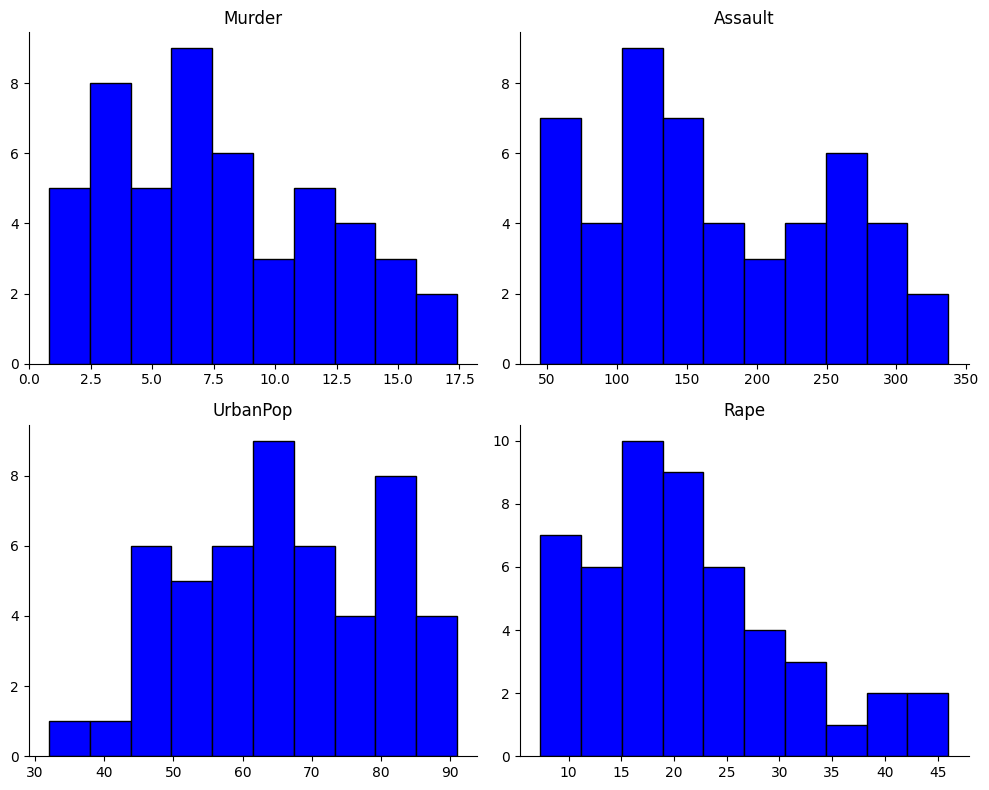

In [133]:
histograms = df.hist(color='blue',edgecolor='black', grid=False,figsize=(10, 8))
for ax in histograms.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()


Visualisation of the distribution of for each variable using a histogram plot

## Correlation Analysis

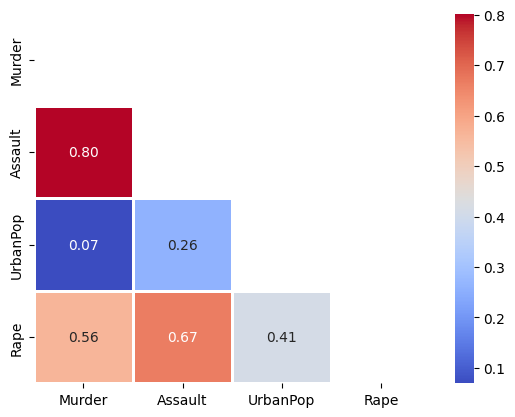

In [134]:
cities = df.index
corr_df = df.corr()
labels =corr_df.columns

corrs = df.corr()
dropSelf = np.zeros_like(corrs)
dropSelf[np.triu_indices_from(dropSelf)] = True
ax = sns.heatmap(corrs, cmap='coolwarm', annot=True, fmt=".2f", mask=dropSelf, linewidth=2)



The plot displays a linear correlation between variables that are positively correlated. Variables that exhibit a strong positive correlation are colored in red, and those  a weak positive correlation are colored in blue.

The correlation plot shows that Assult has strong correlations with Murder and Rape. Urban population has the weakest correlation with all arrest charges.

## PCA

Principal Components Analysis (PCA) is a technique used to identify the key variables, also known as principal components, that most effectively differentiate observations by identifying the directions in which the data points are most dispersed. The identification of principal components is based on maximizing variance and therefore, variables with significantly higher variances than the other variables may exert a disproportionate influence on the analysis purely due to their scale. PCA is a dimensionality reduction technique that is particularly useful when working with a large number of variables that need to be streamlined.

In [135]:
from sklearn.decomposition import PCA
np.set_printoptions(precision=2)

X = df.values.squeeze()
pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.index = df.index
d={ 0: 'PCA 1',
    1: 'PCA 2',
    2: 'PCA 3',
    3: 'PCA 4'  }
df_pca.rename(columns = d,inplace=True)
df_pca.transpose()

States,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
PCA 1,64.80,92.83,124.07,18.34,107.42,34.98,-60.89,66.73,165.24,40.54,...,-86.11,17.51,31.29,-49.91,-124.71,-14.82,-25.08,-91.54,-118.18,-10.43
PCA 2,11.45,17.98,-8.83,16.70,-22.52,-13.72,-12.93,-1.35,-6.27,7.29,...,16.60,6.51,-12.98,-17.65,27.31,1.75,-9.97,22.95,-5.51,5.92
PCA 3,-2.49,20.13,-1.69,0.21,6.75,12.28,-8.42,-11.28,-3.00,3.61,...,1.31,6.10,-0.39,1.79,4.80,1.05,4.78,-0.40,-2.71,-3.79
PCA 4,2.41,-4.09,-4.35,-0.52,-2.81,-1.72,-0.70,-3.73,1.25,7.34,...,-1.25,3.92,4.24,-1.87,-2.00,1.17,-2.69,0.74,0.20,-0.52


In [136]:
std = df_pca.describe().transpose()["std"]
pve = pca.explained_variance_ratio_
cpve = np.cumsum(pca.explained_variance_)

table = pd.DataFrame({'Standard Deviation': std.values,
                      'Proportion of Variance Explained': pve,
                      'Cumulative Proportion': cpve})
table.rename(index = d,inplace=True)

table

,Standard Deviation,Proportion of Variance Explained,Cumulative Proportion
PCA 1,83.73,0.97,7011.11
PCA 2,14.21,0.03,7213.11
PCA 3,6.49,0.01,7255.22
PCA 4,2.48,0.00,7261.38


In [137]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.show()

def feature_importance(pca):
    pc1 = abs( pca.components_[0] ) 
    pc2 = abs( pca.components_[1] )

    feat_df = pd.DataFrame()
    feat_df["Features"] = list(labels)
    feat_df.set_index('Features',inplace=True)
    feat_df["PC1 Importance"] = pc1
    feat_df["PC2 Importance"] = pc2
    return(feat_df)

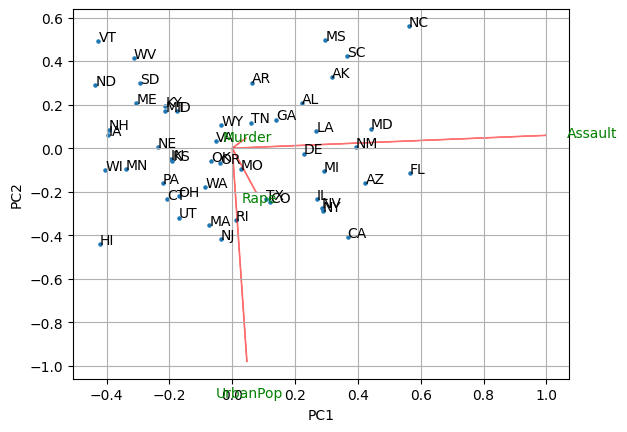

,PC1 Importance,PC2 Importance
Features,,
Murder,0.04,0.04
Assault,1.00,0.06
UrbanPop,0.05,0.98
Rape,0.08,0.20


In [138]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
feature_importance(pca)

Each point on a biplot is the projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors. From this biplot, we see that GDP and the mortality rates for males and females are the most important featuresas the arrows to each of these dominate the biplot.

Assult has the highest impact on PC1 and urban population has the highest impact on PC2. As per the summary statistics table, these two feature have the higher mean values relative the the others. This is likely the reason why the features have the greatest effect on the principle components.

## Standardised data

In [139]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)

df_std_pca.index = df.index
df_std_pca.rename(columns = d,inplace=True)
df_std_pca.transpose()

States,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
PCA 1,0.99,1.95,1.76,-0.14,2.52,1.51,-1.36,0.05,3.01,1.64,...,-1.99,1.00,1.36,-0.55,-2.80,-0.10,-0.22,-2.11,-2.08,-0.63
PCA 2,1.13,1.07,-0.75,1.12,-1.54,-0.99,-1.09,-0.33,0.04,1.28,...,0.82,0.86,-0.41,-1.47,1.40,0.20,-0.97,1.42,-0.61,0.32
PCA 3,-0.44,2.04,0.05,0.11,0.60,1.10,-0.64,-0.72,-0.58,-0.34,...,0.39,0.19,-0.49,0.29,0.84,0.01,0.62,0.10,-0.14,-0.24
PCA 4,0.16,-0.44,-0.83,-0.18,-0.34,0.00,-0.12,-0.88,-0.10,1.08,...,-0.11,0.65,0.64,-0.08,-0.14,0.21,-0.22,0.13,0.18,-0.17


In [140]:
std = df_std_pca.describe().transpose()["std"]
pve = pca.explained_variance_ratio_
cpve = np.cumsum(pca.explained_variance_)

table = pd.DataFrame({'Standard Deviation': std.values,
                      'Proportion of Variance Explained': pve,
                      'Cumulative Proportion': cpve})
table.rename(index = d,inplace=True)

table

,Standard Deviation,Proportion of Variance Explained,Cumulative Proportion
PCA 1,1.59,0.97,7011.11
PCA 2,1.00,0.03,7213.11
PCA 3,0.60,0.01,7255.22
PCA 4,0.42,0.00,7261.38


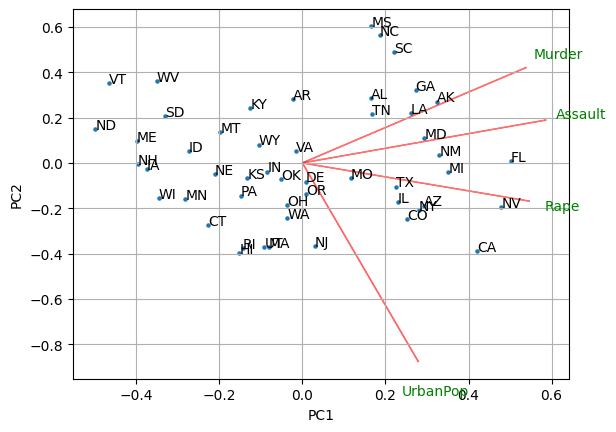

,PC1 Importance,PC2 Importance
Features,,
Murder,0.54,0.42
Assault,0.58,0.19
UrbanPop,0.28,0.87
Rape,0.54,0.17


In [141]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
feature_importance(std_pca)


More variables are used to explain the variance. Some features are clustered together in groups. The feature importance shows that most of the variables contribute fairly evenly. Urban population is close to perpendicular to the arrest cases suggesting that crime rate is not dependent on urban population

Text(0.5, 1.0, 'Cumulative Explained Variance')

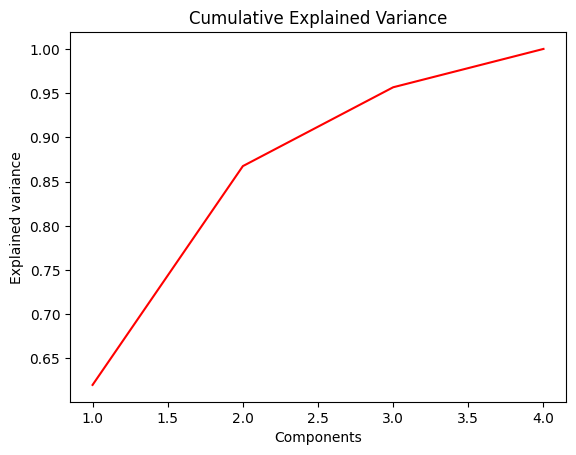

In [142]:
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

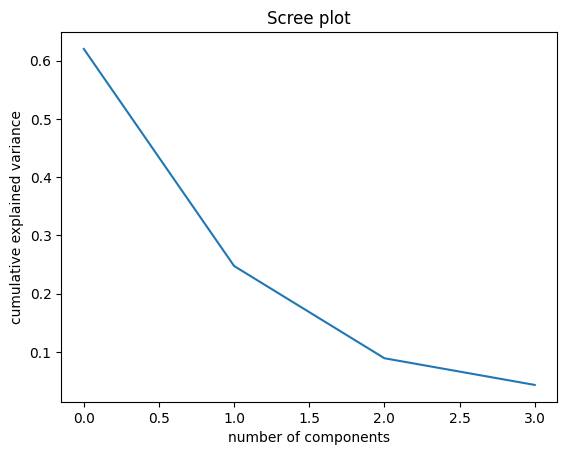

In [143]:
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first 3 principal components together explain around 95% of the variance. We can therefore use them to perform cluster analysis. This is what we refer to as dimensionality reduction. 3 variables explaining most of the variability. 


In [144]:
pca_df = pd.DataFrame(X_std_trans[:,0:3], index = df.index)
pca_df.head()

,0,1,2
States,,,
AL,0.99,1.13,-0.44
AK,1.95,1.07,2.04
AZ,1.76,-0.75,0.05
AR,-0.14,1.12,0.11
CA,2.52,-1.54,0.60


# Hierarchical clustering

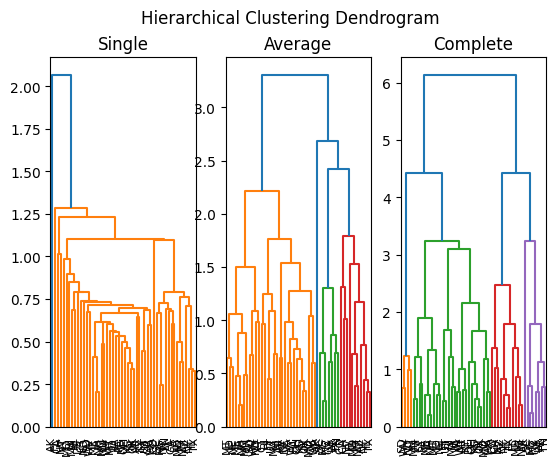

In [145]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)
fig, (ax1, ax2, ax3,) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) 
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)

plt.show()

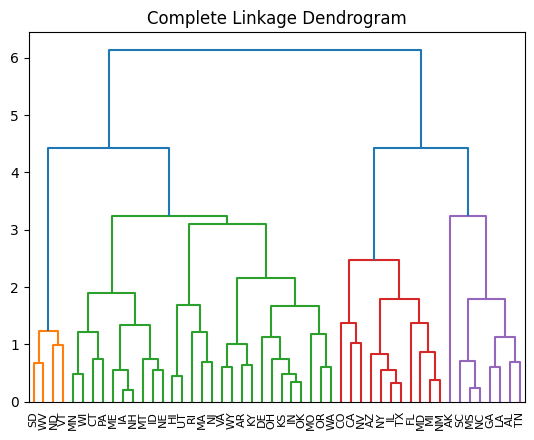

In [146]:
plt.title("Complete Linkage Dendrogram")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

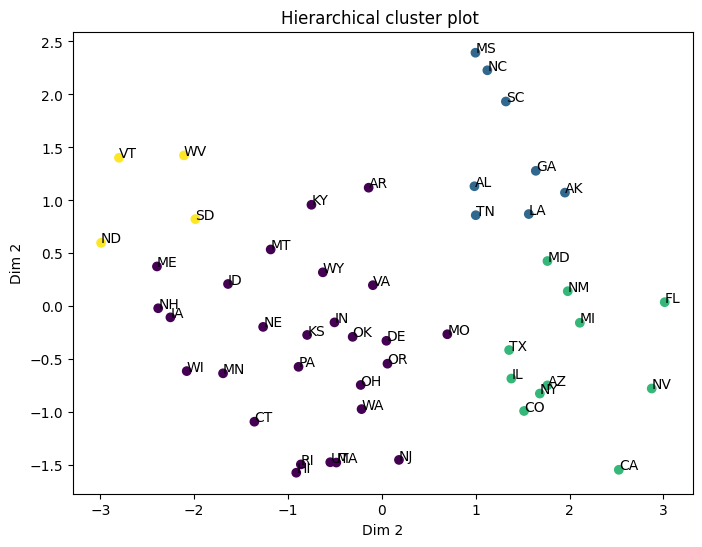

In [149]:
k=4
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
cluster_labels = cluster.fit_predict(pca_df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df.values[:,0], pca_df.values[:,1], c=cluster_labels)
plt.title("Hierarchical cluster plot ")
plt.xlabel("Dim 2")
plt.ylabel("Dim 2")

for i, txt in enumerate(df.index):
    plt.annotate(txt, (pca_df.values[i, 0], pca_df.values[i, 1]))


# K-means clustering


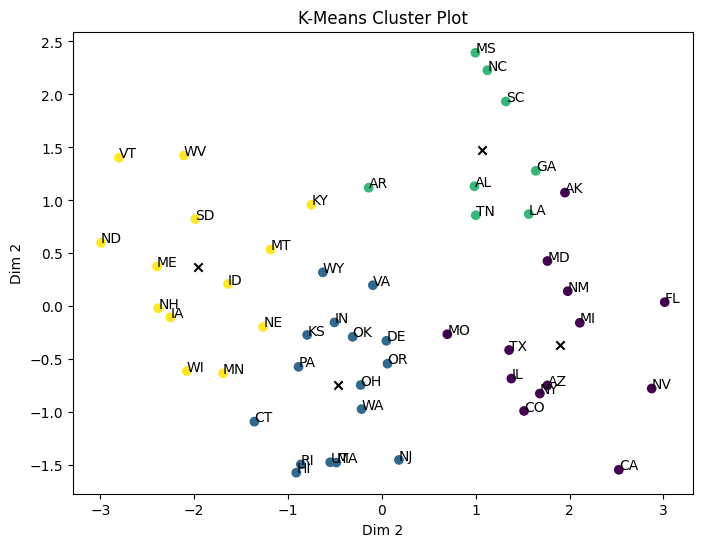

In [153]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=420)
labels = kmeans.fit_predict(pca_df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df.values[:, 0], pca_df.values[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x',  color='black')
plt.title(f"K-Means Cluster Plot")
plt.xlabel("Dim 2")
plt.ylabel("Dim 2")

for i, txt in enumerate(df.index):
    plt.annotate(txt, (pca_df.values[i, 0], pca_df.values[i, 1]))
